#Кластерний аналіз методом к-середніх
Черних Максим

# Завдання
1. Реалізувати алгоритм кластеризації к-середніх з використанням розроблених метрих.
2. Провести кластерний аналіз з розбиттям на 3, 4 та 5 кластерів на стандартизованих даних.
3. Візуалізувати результати кластеризації.
4. Висновки про результати кластеризації (кількість об'єктів в кластерах, коротка характеристика об'єктів за допомогою описовою статистики).

# Реалізація алгоритму кластерізації k-середніх


Iмпортування необхідних для роботи бібліотек

In [ ]:
import copy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt

Завантаження датасету смертності від травм

In [ ]:
pd.read_excel(f"InjuryDeath.xlsx",)

,age,inj_dth,childyrs,age_mom,lbw,educ_mom,income,illegit,oth_chld,race_mom,pnclate
0,0,0,28.294319,24,1,15,3,1,0,0,0
1,0,0,0.091718,24,1,11,2,1,2,0,1
2,1,0,20.000000,24,1,15,3,0,3,0,0
3,0,0,10.000000,30,1,16,1,1,2,1,0
4,0,0,10.000000,30,1,12,3,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
15181,4,0,18.535250,19,1,12,2,1,0,1,1
15182,0,0,31.711157,24,0,11,5,1,1,0,1
15183,2,0,23.915127,30,0,16,4,0,0,0,1
15184,0,0,15.544147,29,0,16,1,1,1,1,1


In [ ]:
def df_dataset():
  df = pd.read_excel(f"InjuryDeath.xlsx",)
  df = df.dropna()
  for col_name in df.columns.tolist():
        df[col_name] = (df[col_name] - np.min(df[col_name])) / (np.max(df[col_name]) - np.min(df[col_name]))

  points = df[['childyrs', 'oth_chld', 'lbw']].values

  return df, points

df_dataset()[0]

,age,inj_dth,childyrs,age_mom,lbw,educ_mom,income,illegit,oth_chld,race_mom,pnclate
0,0.00,0.0,0.004531,0.454545,1.0,0.8,0.50,1.0,0.00,0.0,0.0
1,0.00,0.0,0.000015,0.454545,1.0,0.0,0.25,1.0,0.50,0.0,1.0
2,0.25,0.0,0.003203,0.454545,1.0,0.8,0.50,0.0,0.75,0.0,0.0
3,0.00,0.0,0.001601,1.000000,1.0,1.0,0.00,1.0,0.50,1.0,0.0
4,0.00,0.0,0.001601,1.000000,1.0,0.2,0.50,1.0,0.00,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
15181,1.00,0.0,0.002968,0.000000,1.0,0.2,0.25,1.0,0.00,1.0,1.0
15182,0.00,0.0,0.005078,0.454545,0.0,0.0,1.00,1.0,0.25,0.0,1.0
15183,0.50,0.0,0.003830,1.000000,0.0,1.0,0.75,0.0,0.00,0.0,1.0
15184,0.00,0.0,0.002489,0.909091,0.0,1.0,0.00,1.0,0.25,1.0,1.0


Проаналізувавши датасет бачимо, що присутні NA, тому ми неповні дані видаляємо.
Змінна lbw - якісна, тому що приймає значення 0 або 1.

Проведемо нормування даних

In [ ]:
_, norm_points = df_dataset()
norm_points

array([[4.53124295e-03, 0.00000000e+00, 1.00000000e+00],
       [1.45426556e-05, 5.00000000e-01, 1.00000000e+00],
       [3.20289194e-03, 7.50000000e-01, 1.00000000e+00],
       ...,
       [3.82990696e-03, 0.00000000e+00, 0.00000000e+00],
       [2.48927867e-03, 2.50000000e-01, 0.00000000e+00],
       [1.60137289e-03, 2.50000000e-01, 0.00000000e+00]])

Метрики


In [ ]:
def dpb(x, y, method):
    if method == "evclid":
        distance = 0
        for i in range(len(x)):
            distance += (x[i]-y[i])**2
        return sqrt(distance)
    if method == "evclid_square":
        distance = 0
        for i in range(len(x)):
            distance += (x[i]-y[i])**2
        return distance
    if method == "manheten":
        distance = 0
        for i in range(len(x)):
            distance += abs(x[i]-y[i])
        return distance
    if method == "abs":
        lst = []
        for i in range(len(x)):
            lst.append(abs(x[i]-y[i]))
        return max(lst)


Реалізація алгоритму кластерного аналізу методом k-середніх

In [ ]:
def k_means(clusters_number, method):

    _, points = df_dataset()

    df = pd.read_excel(f"InjuryDeath.xlsx",)
    df = df.dropna()

    points = df[['childyrs', 'oth_chld', 'lbw']].values

    n = len(points)

    centroids = []
    for i in range(clusters_number):
        index = np.random.choice(range(n), replace=False)
        centroids.append([points[index][0], points[index][1], points[index][2]])

    pre_centroids = []
    while True:
        clusters = [[] for i in range(clusters_number)]
        for i in range(len(points)):
            distances = []
            for j in range(clusters_number):
                distances.append(dpb(centroids[j], points[i], method))
            min_dist = min(distances)
            point = [points[i][0], points[i][1], points[i][2]]
            clusters[distances.index(min_dist)].append(point)

        if pre_centroids != centroids:
            pre_centroids = copy.deepcopy(centroids)
            for i in range(clusters_number):
                if len(clusters[i]) != 0:
                    x1 = 0
                    x2 = 0
                    x3 = 0
                    for j in range(len(clusters[i])):
                        x1 += clusters[i][j][0]
                        x2 += clusters[i][j][1]
                        x3 += clusters[i][j][2]
                    centroids[i][0] = x1 / len(clusters[i])
                    centroids[i][1] = x2 / len(clusters[i])
                    centroids[i][2] = x3 / len(clusters[i])
        else:
            break


    return clusters, centroids



Візуалізація кластерів

In [ ]:
def vizualization_2D(x, y, num, method):
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes()

    for i in range(len(x)):
        x_coordinates = []
        y_coordinates = []

        x_mean = []
        y_mean = []
        for q in range(len(x[i])):
            x_coordinates.append(x[i][q][0])
            y_coordinates.append(x[i][q][1])

        for q in range(len(y[i])):
            x_mean.append(y[i][0])
            y_mean.append(y[i][1])

        plt.title(f"Кількість кластерів {num}. Метрика - {method}", fontsize=20)
        plt.xlabel("childyrs", fontsize=15)
        plt.ylabel("oth_chld", fontsize=15)

        ax.scatter(x_mean, y_mean, c='red', marker='o', s=120)
        ax.scatter(x_coordinates, y_coordinates)

    plt.show()

def vizualization_3D(x, y, num, method):
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes(projection="3d")

    for i in range(len(x)):
        x_coordinates = []
        y_coordinates = []
        z_coordinates = []

        x_mean = []
        y_mean = []
        z_mean = []
        for q in range(len(x[i])):
            x_coordinates.append(x[i][q][0])
            y_coordinates.append(x[i][q][1])
            z_coordinates.append(x[i][q][2])

        for q in range(len(y[i])):
            x_mean.append(y[i][0])
            y_mean.append(y[i][1])
            z_mean.append(y[i][2])

        plt.title(f"Кількість кластерів {num}. Метрика - {method}", fontsize=20,
                  loc='right')
        ax.set_xlabel("childyrs", fontsize=15)
        ax.set_ylabel("oth_chld", fontsize=15)
        ax.set_zlabel("lbw", fontsize=15)

        ax.scatter(x_mean, y_mean, z_mean, c='red', marker='', s=120)
        ax.scatter(x_coordinates, y_coordinates, z_coordinates)

    plt.show()


Отримання результатів алгоритму та побудова графіків.

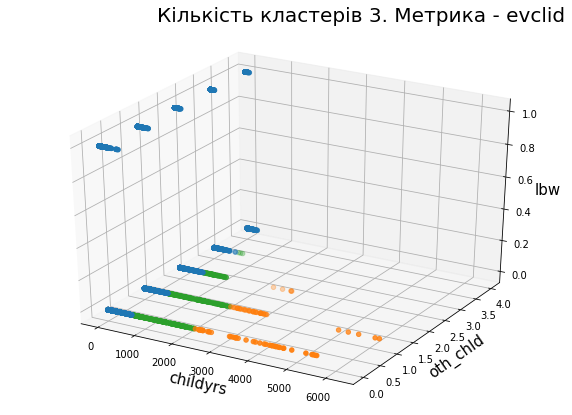

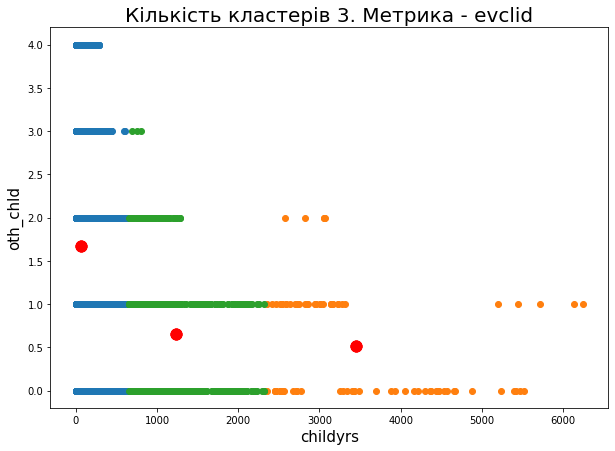

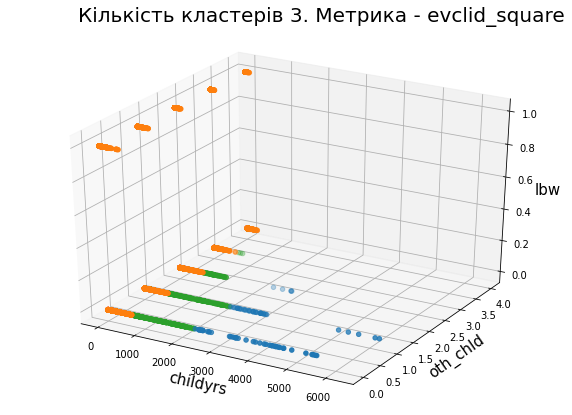

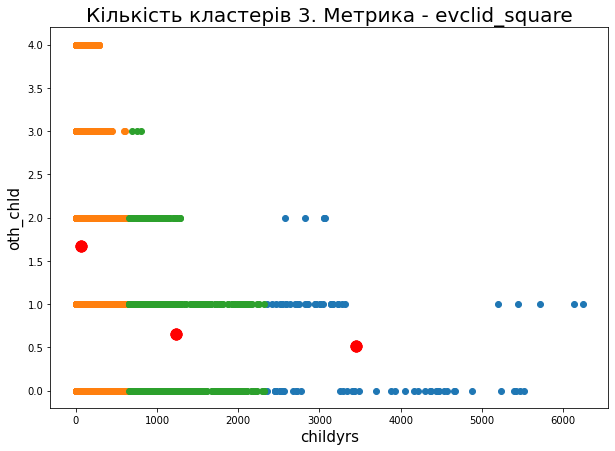

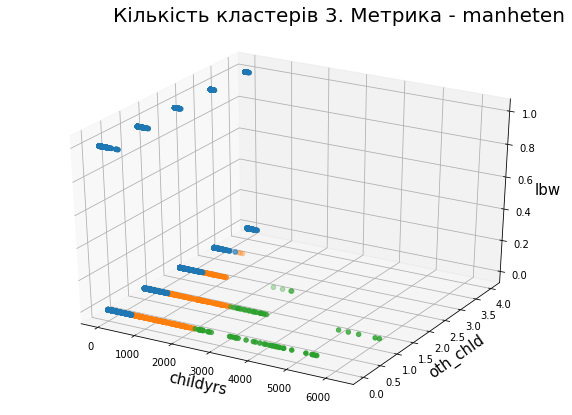

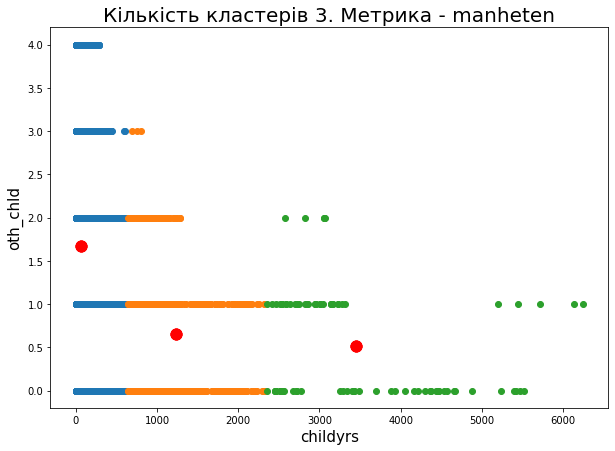

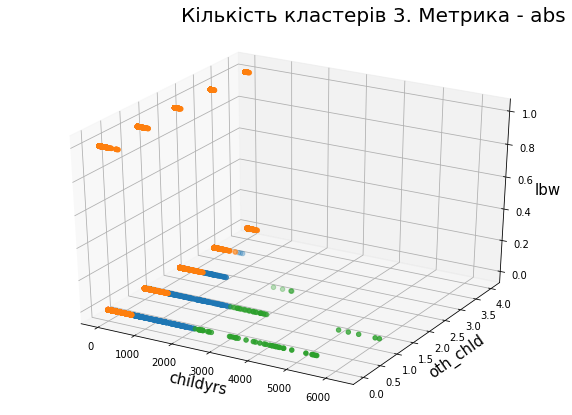

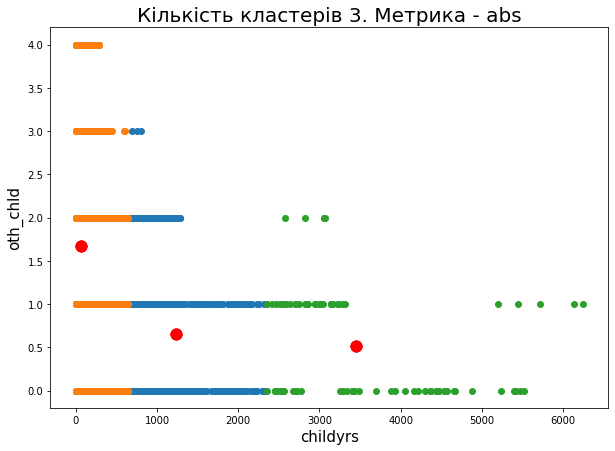

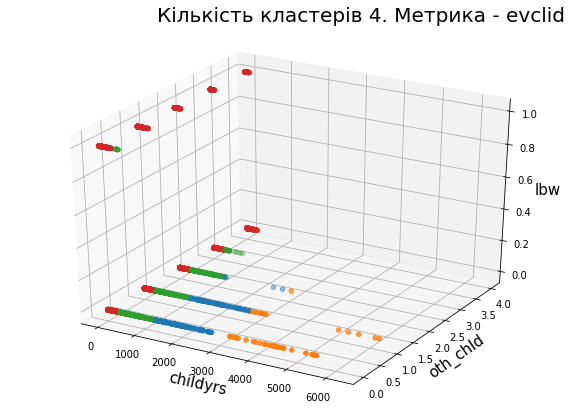

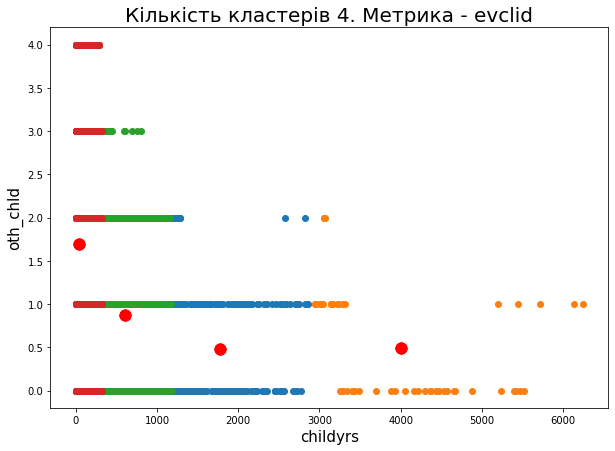

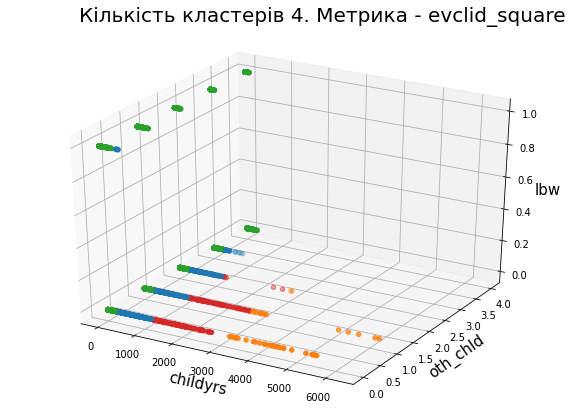

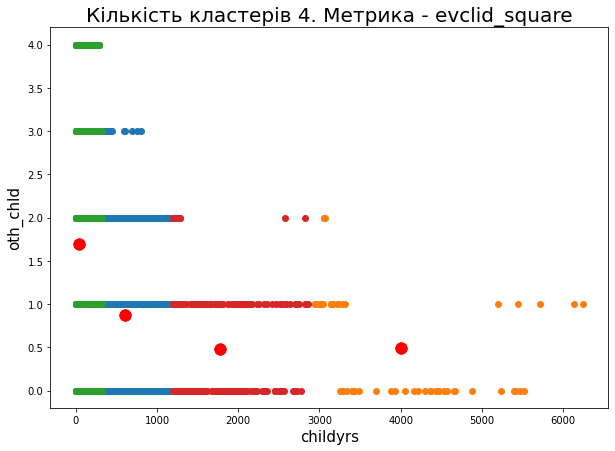

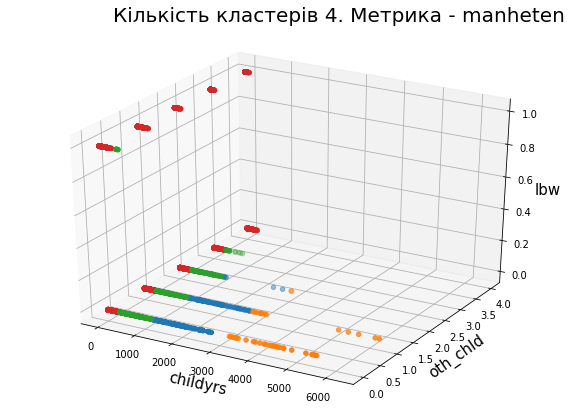

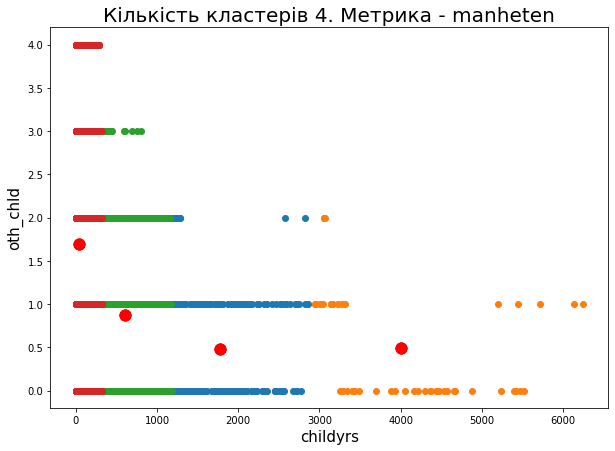

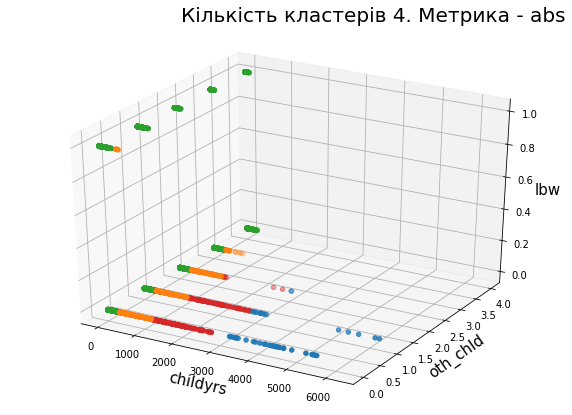

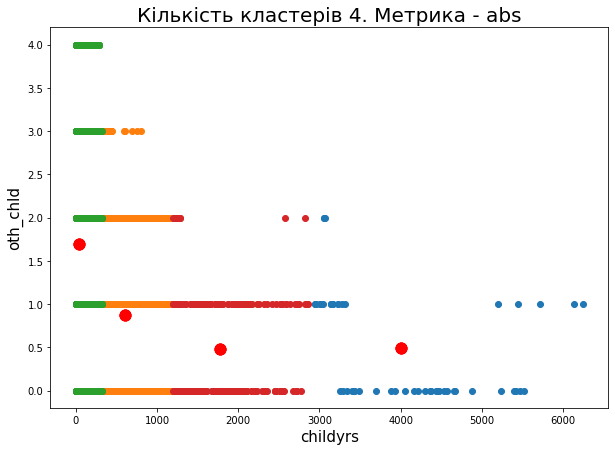

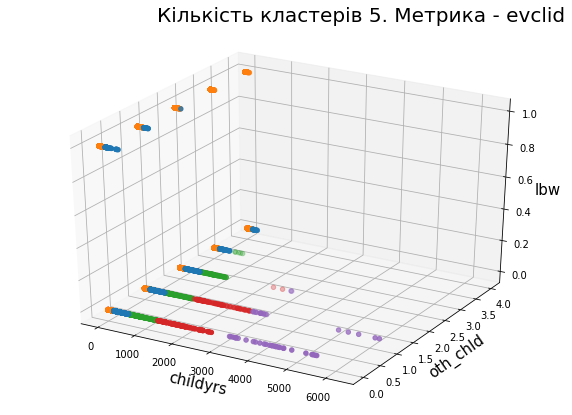

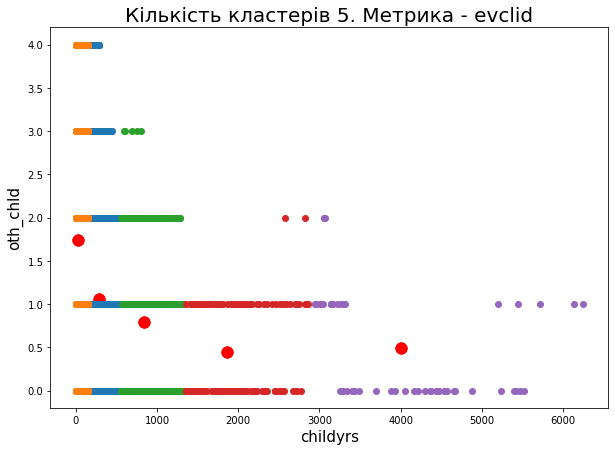

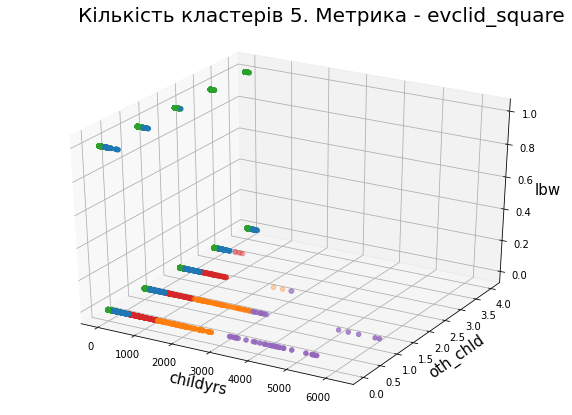

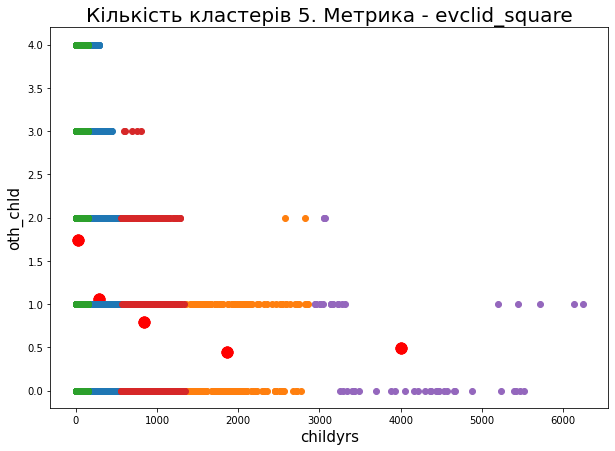

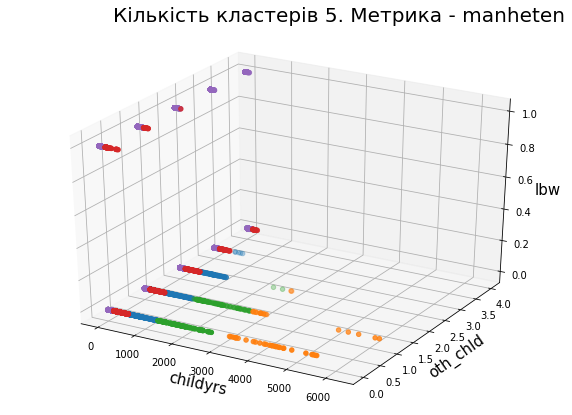

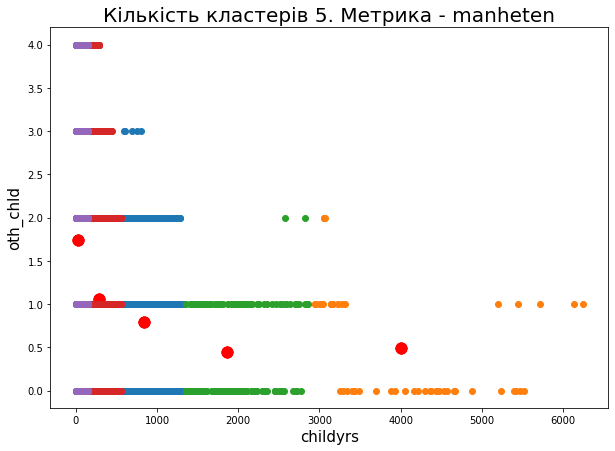

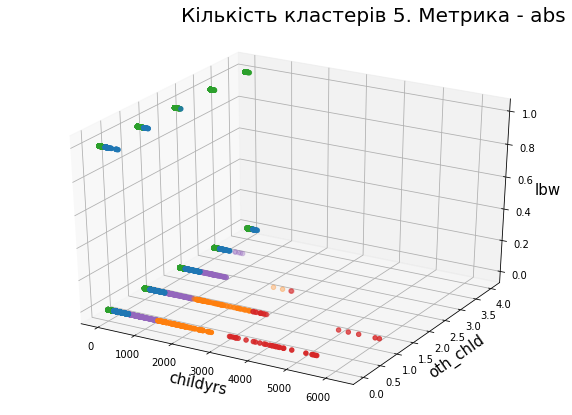

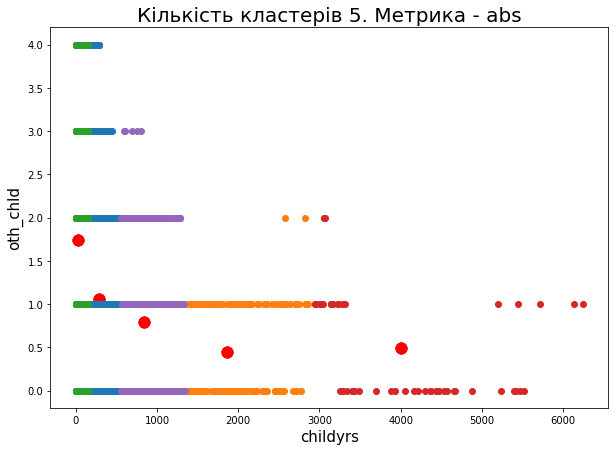

In [ ]:
metrics = ["evclid", "evclid_square", "manheten", "abs"]
clusters = [3,4,5]
for j in clusters:
  for i in metrics:
    x,y = k_means(j, i)
    vizualization_3D(x, y, j, i)
    vizualization_2D(x, y, j, i)


Аналіз отриманих результатів.
З графіків бачимо, що при збільшенні кількості кластерів дані об'еднуються там де вони більш сгруповані. Тому я вважаю, що найкращою кількістю кластерів буде 3 кластери (4 у разі бажання отримати, більш "окреміші групи").  
 
У даному випадку найкраще спрацювала метрика евклідовоіі відстані. Якби дані не були нормовані, то кращим варіантом було використовувати метрику евклідового квадрату.

У ході експериментів було вирішено залишити візуалізація не нормованих даних, тому що вони краще показують дію методу k-means, аніж нормовані дані. При нормованих даних, кластери "ідять" один одного тим самим об'єднуючись в один кластер. Це можна побачити далі у виведені кількості об'єктів у кластерах.

In [ ]:
def count_objects(method):
  metrics = [method]
  clusters = [3,4,5]
  size = []
  for j in range(len(clusters)):
    size.append([])
    for i in metrics:
      x,y = k_means(clusters[j], i)
      for k in range(len(x)):
        size[j].append(len(x[k]))

  return size

Отримаємо дані о кількості об'єктів в кластерах (при нормованих даних)

In [ ]:
metrics = ["evclid", "evclid_square", "manheten", "abs"]
for i in metrics:
  print(f"{i} - {count_objects(i)}")

evclid - [[4874, 5450, 4862], [2869, 4874, 2581, 4862], [1413, 4874, 4862, 1488, 2549]]
evclid_square - [[9736, 4037, 1413], [2869, 2761, 2581, 6975], [4037, 1413, 1215, 3659, 4862]]
manheten - [[6975, 2761, 5450], [0, 5450, 6975, 2761], [2443, 4532, 1413, 2761, 4037]]
abs - [[2761, 6975, 5450], [4867, 2581, 2869, 4869], [2581, 1381, 183, 9736, 1305]]


Бачимо, що деякі кластери об'єдналися в один.
Кількість об'єктів на не нормованих даних:

In [ ]:
metrics = ["evclid", "evclid_square", "manheten", "abs"]
for i in metrics:
  print(f"{i} - {count_objects(i)}")

evclid - [[477, 14622, 87], [14139, 53, 733, 261], [220, 13147, 385, 1381, 53]]
evclid_square - [[477, 14622, 87], [733, 14139, 53, 261], [53, 220, 1381, 385, 13147]]
manheten - [[87, 14617, 482], [53, 261, 733, 14139], [385, 220, 1381, 13147, 53]]
abs - [[477, 14622, 87], [14139, 53, 261, 733], [385, 220, 53, 13147, 1381]]


Бачимо, що об'єкти розташовані більше у другому кластері. Та бачимо, чому саме евклідовий квадрат використовують для далеких відстаней між об'єктами саме цей метод зібрав в останньому кластері велику кількість об'єктів.

# Висновки

У даній роботі було розроблено алгоритм кластерізацііі методом k-середніх. Були нормовані дані, а також побудовані 3д та 2д графіки з 3,4 та 5 кластерами, а також використані усі метрики, а також позначені центри кластерів.